*** Much of the code on this page was generated using Claude Code and used for educational purposes. (August, 2025)" 

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_iris

In [30]:
data = load_iris()
X = iris.data  # features
y = iris.target  # labels

In [32]:
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns=iris.feature_names)
  df['target'] = iris.target

  df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Number of features: {X.shape[1]}")

Training set: (120, 4)
Test set: (30, 4)
Number of features: 4


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create the six models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',
multi_class='ovr')),
    ('K Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Gaussian NB', GaussianNB())
]

# Train each model
trained_models = []
for name, model in models:
    model.fit(X_train, Y_train)
    trained_models.append((name, model))
    print(f"{name} trained")

Logistic Regression trained
K Neighbors trained
Decision Tree trained
Random Forest trained
SVM trained
Gaussian NB trained


/Users/aaronpanych/Sync/ML2025/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/aaronpanych/Sync/ML2025/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.58      0.70        12
   virginica       0.67      0.91      0.77        11

    accuracy                           0.80        30
   macro avg       0.85      0.83      0.82        30
weighted avg       0.83      0.80      0.80        30


K Neighbors Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30


Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolo

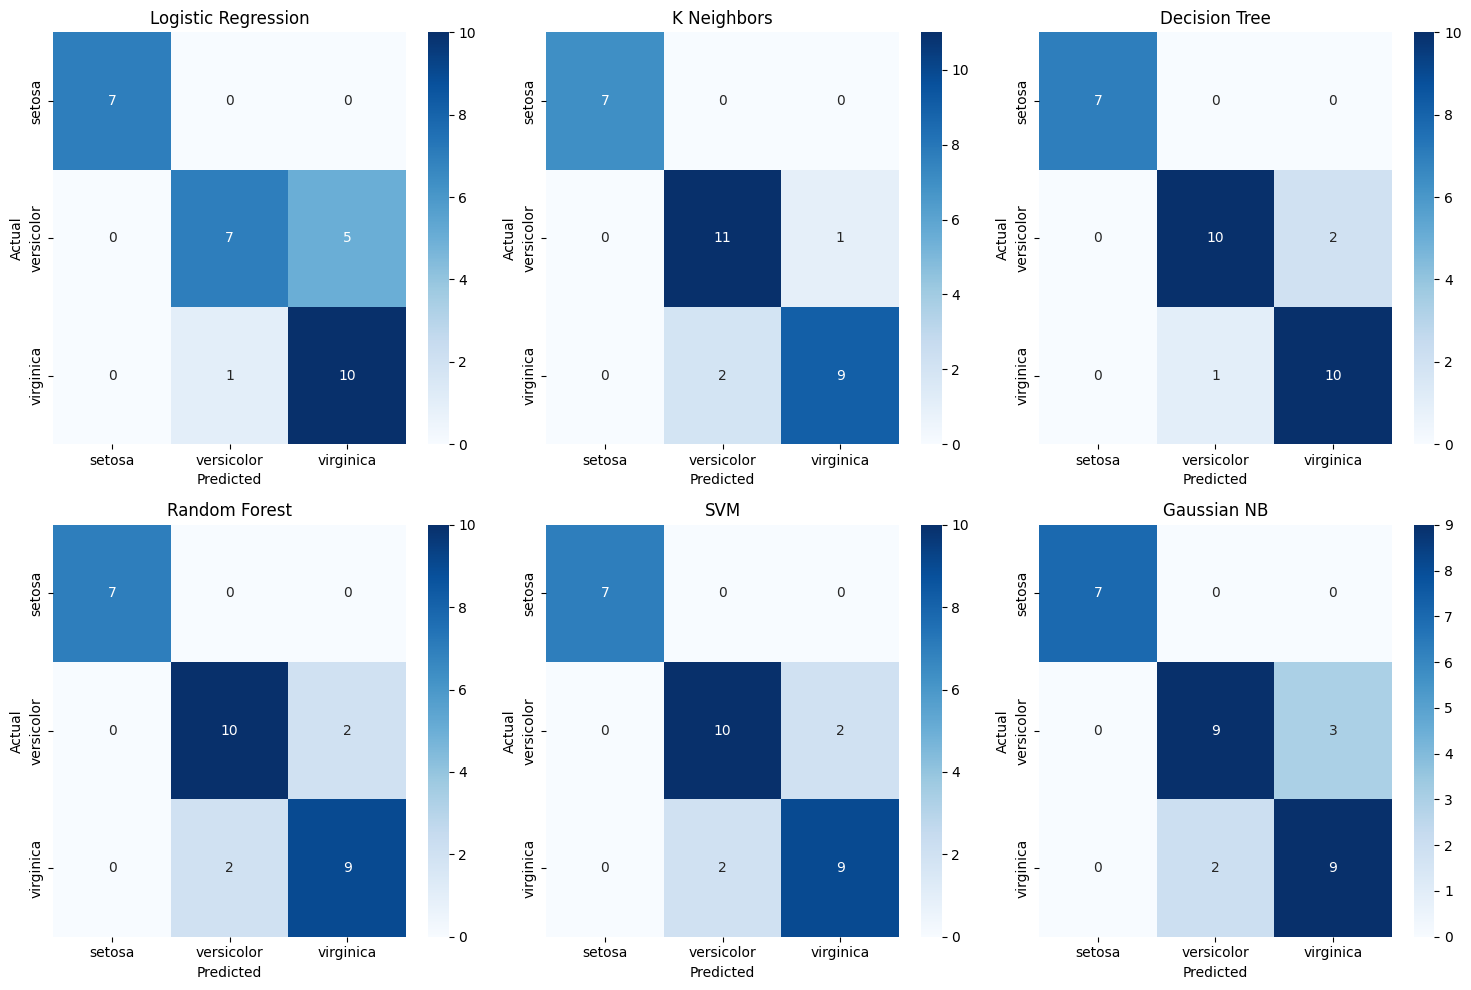

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create predictions and confusion matrices for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(trained_models):
    # Make predictions
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(Y_test, y_pred,
target_names=iris.target_names))

plt.tight_layout()
plt.show()

Logistic Regression: 0.8000
K Neighbors: 0.9000
Decision Tree: 0.9000
Random Forest: 0.8667
SVM: 0.8667
Gaussian NB: 0.8333


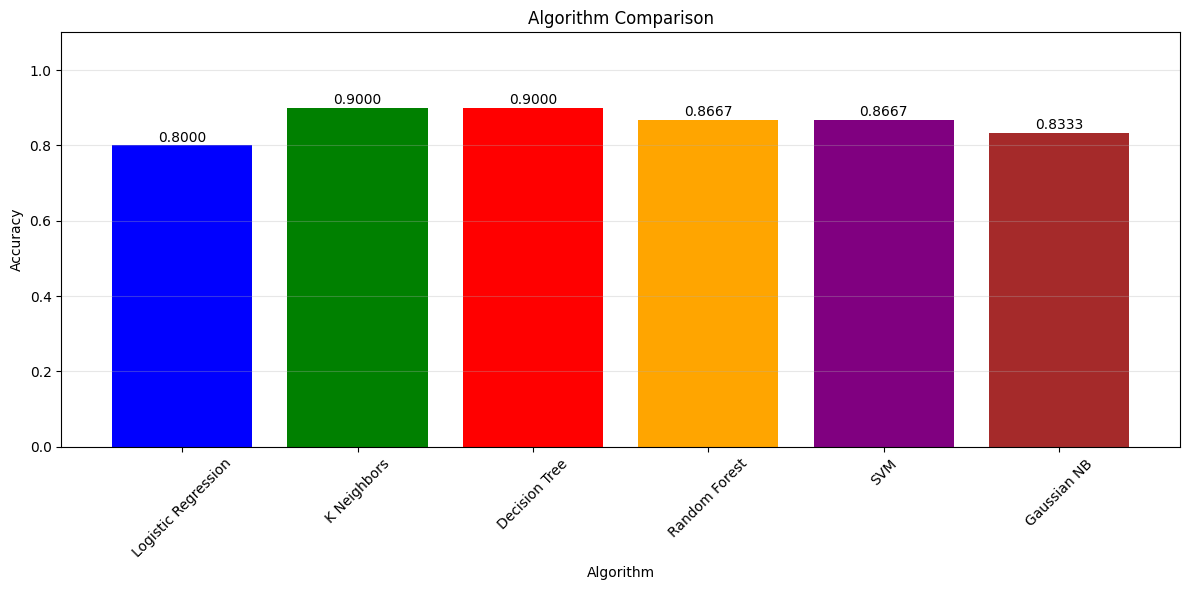

In [38]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy for each model
model_names = []
accuracies = []

for name, model in trained_models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    print(f"{name}: {accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange',
'purple', 'brown'])
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add accuracy values on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')

plt.tight_layout()
plt.show()